## Identifying and Removing Outliers

In [3]:
%run load_data.py

In [4]:
%matplotlib inline

To identify outliers in the data, we will use what is [the Tukey Method](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/). 

- leverages the Interquartile Range 
- isn’t dependent on distributional assumptions 
- ignores the mean and standard deviation
- making it resistant to being influenced by the extreme values in the range

**Tukey's Method:** look for points that are more than 1.5 times the Inter-quartile range above the third quartile or below the first quartile.

In [8]:
def feature_outliers(dataframe, col, param=1.5):
    Q1 = np.percentile(dataframe[col], 25)
    Q3 = np.percentile(dataframe[col], 75)
    tukey_window = param*(Q3-Q1)
    less_than_Q1 = dataframe[col] < Q1 - tukey_window
#     print(less_than_Q1)
    greater_than_Q3 = dataframe[col] > Q3 + tukey_window
    tukey_mask = (less_than_Q1 | greater_than_Q3)
    return dataframe.loc[tukey_mask]

In [11]:
feature_outliers(customer_features, 'Grocery')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
28,4113,20484,25957,1158,8604,5206
43,630,11095,23998,787,9529,72
47,44466,54259,55571,7782,24171,6465
49,4967,21412,28921,1798,13583,1163
56,4098,29892,26866,2616,17740,1340
61,35942,38369,59598,3254,26701,2017
65,85,20959,45828,36,24231,1423
77,12205,12697,28540,869,12034,1009
85,16117,46197,92780,1026,40827,2944
86,22925,73498,32114,987,20070,903


In [13]:
for col in customer_log_sc_df:
    print(col, feature_outliers(customer_features, col).shape)

Fresh (20, 6)
Milk (28, 6)
Grocery (24, 6)
Frozen (43, 6)
Detergents_Paper (30, 6)
Delicatessen (27, 6)


What if we count the rows that show up as an outlier more than once?

In [14]:
from collections import Counter

In [17]:
def multiple_outliers(dataframe, count=2):
    raw_outliers = []
    for col in dataframe:
        outlier_df = feature_outliers(dataframe, col)
        raw_outliers += list(outlier_df.index)

    outlier_count = Counter(raw_outliers)
    outliers = [k for k,v in outlier_count.items() if v >= count]
    return outliers

In [18]:
len(multiple_outliers(customer_features))

41

In [19]:
len(multiple_outliers(customer_sc_df))

41

In [20]:
len(multiple_outliers(customer_log_sc_df))

5

In [21]:
len(multiple_outliers(customer_box_cox_sc_df))

2

In [11]:
customer_log_sc_df.shape

(440, 6)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


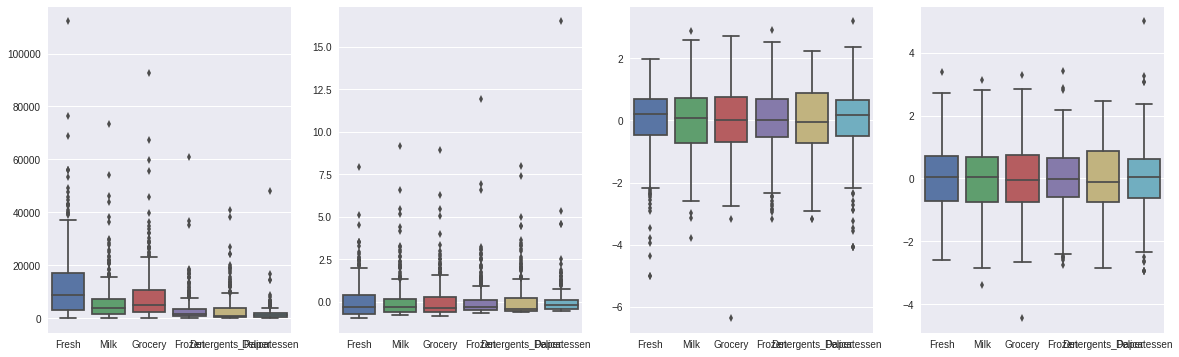

In [26]:
_, ax = plt.subplots(1,4,figsize=(20,6))

for i, df in enumerate([customer_features, customer_sc_df, customer_log_sc_df, customer_box_cox_sc_df]):
    sns.boxplot(df, ax=ax[i])

In [22]:
customer_features_outliers_removed = customer_features.drop(multiple_outliers(customer_features))
customer_sc_df_outliers_removed = customer_sc_df.drop(multiple_outliers(customer_sc_df))
customer_log_sc_df_outliers_removed = customer_log_sc_df.drop(multiple_outliers(customer_log_sc_df))
customer_box_cox_sc_df_outliers_removed = customer_box_cox_sc_df.drop(multiple_outliers(customer_box_cox_sc_df))

In [23]:
(customer_features_outliers_removed.shape,
 customer_sc_df_outliers_removed.shape,
 customer_log_sc_df_outliers_removed.shape,
 customer_box_cox_sc_df_outliers_removed.shape)

((399, 6), (399, 6), (435, 6), (438, 6))